<h1 style="font-size:50px;color:#FF7600;text-align:left"><strong>🪂Topic modelling(LDA)</strong> <strong style="color:green">on Trip advisor dataset✈️</strong></h1>

<p style = "font-size: 40px;font-weight: bold;text-align:left;color:#0000FF"> What is Topic Modelling? </p>

<p style="font-size:120%"><strong><mark>Topic modeling is an unsupervised machine learning technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents.</mark></strong>

<p style = "font-size: 40px;font-weight: bold;text-align:left;color:#0000FF"> How Does Topic Modeling Work? </p>

<img align=left src = "https://www.analyticsvidhya.com/wp-content/uploads/2016/08/Modeling1.png">

- It’s simple, really. Topic modeling involves counting words and grouping similar word patterns to infer topics within unstructured data. Let’s say you’re a software company and you want to know what customers are saying about particular features of your product. Instead of spending hours going through heaps of feedback, in an attempt to deduce which texts are talking about your topics of interest, you could analyze them with a topic modeling algorithm.
- By detecting patterns such as word frequency and distance between words, a topic model clusters feedback that is similar, and words and expressions that appear most often. With this information, you can quickly deduce what each set of texts are talking about. Remember, this approach is ‘unsupervised’ meaning that no training is required.



<p style = "font-size: 40px;font-weight: bold;text-align:left;color:#0000FF"> Famous Topic Modeling method Latent Semantic Analysis (LSA) </p>

<img align=left src = "https://i.ibb.co/3zNV9vX/1-Gp-PEknl-KMQ09-Uk-Et-Y6-MZOw.png">

- Latent Semantic Analysis (LSA) is one of the most frequent topic modeling methods analysts make use of. It is based on what is known as the distributional hypothesis which states that the semantics of words can be grasped by looking at the contexts the words appear in. In other words, under this hypothesis, the semantics of two words will be similar if they tend to occur in similar contexts.

- That said, LSA computes how frequently words occur in the documents – and the whole corpus – and assumes that similar documents will contain approximately the same distribution of word frequencies for certain words. In this case, syntactic information (e.g. word order) and semantic information (e.g. the multiplicity of meanings of a given word) are ignored and each document is treated as a bag of words.

- The standard method for computing word frequencies is what is known as tf-idf. This method computes frequencies by taking into consideration not only how frequent words are in a given document, but also how frequent words are in all the corpus of documents. Words with a higher frequency in the full corpus will be better candidates for document representations than less frequent words, regardless of how many times they appear in individual documents. As a result, tf-idf representations are much better than those that only take into consideration word frequencies at document level.

- Once tf-idf frequencies have been computed, we can create a Document-term matrix which shows the tf-idf value for each term in a given document. This matrix will have rows for every document in the corpus and columns for every term considered.



<img align=left src= "https://monkeylearn.com/static/5b3e5567ccfcf3f2b8c96c125589062f/1ec3b/d58b3fa6effe4a00b612495ce2937a10.webp">

<p style="font-size:120%"><strong><mark>This Document-term matrix can be decomposed into the product of 3 matrices (USV) by using singular value decomposition (SVD). The U matrix is known as the Document-topic matrix and the V matrix is known as the Term-topic matrix: </mark></strong>

<img align=left src = "https://monkeylearn.com/static/7f343842ee871e0fe7393126ed20e069/3ea62/c6a4c958656249e780f5c8d88b53c421.webp">

In [ ]:
#importing libaries
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know',
                   'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see',
                   'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even',
                   'right', 'line', 'even', 'also', 'may', 'take', 'come'])

# Reading the dataset

In [ ]:
#reading the dataset
df= pd.read_csv('../input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')
display(df.head(5))

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
#chekcing the number of reviews we have
print("Number of reviews - ",df.shape)

Number of reviews -  (20491, 2)


<p style="font-size:200%"><strong><mark>Processing 20k will take a long time so, I am going to use top 5000 reviews for this analysis</mark></strong>

In [ ]:
df_5000= df[0:5000]

# Tokenize Sentences and Clean

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True)
        yield(sent)

# Convert to list
data = df_5000.Review.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'did', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'non', 'existent', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillows', 'not', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morning', 'loud', 'bangs', 'doors', 'opening', 'closing', 'hear', 'people', 'talking', 'hallway', 'maybe', 'just', 'noisy', 'neighbors', 'aveda', 'bath', 'products', 'nice', 'did', 'not', 'goldfish', 'stay', 'nice', 'touch', 'taken', 'advantage', 'staying', 'longer', 'location', 'great', 'walking', 'distance', 'shopping', 'overall', 'nice', 'experience', 'having', 'pay', 'parking', 'night']]


# Build the Bigram, Trigram Models and Lemmatize

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load("en_core_web_sm")
    #nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

# Build the Topic Model

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.021*"wife" + 0.018*"ticket" + 0.015*"certainly" + 0.012*"marble" + '
  '0.012*"property" + 0.011*"disappoint" + 0.010*"base" + 0.010*"send" + '
  '0.009*"member" + 0.008*"contact"'),
 (1,
  '0.063*"hotel" + 0.035*"room" + 0.029*"stay" + 0.019*"staff" + '
  '0.017*"location" + 0.017*"great" + 0.014*"breakfast" + 0.010*"night" + '
  '0.009*"restaurant" + 0.008*"service"'),
 (2,
  '0.055*"room" + 0.016*"shower" + 0.011*"problem" + 0.011*"check" + '
  '0.010*"day" + 0.010*"leave" + 0.010*"arrive" + 0.009*"reservation" + '
  '0.009*"tell" + 0.009*"desk"'),
 (3,
  '0.025*"quality" + 0.014*"beach" + 0.013*"receive" + 0.011*"truly" + '
  '0.011*"simply" + 0.010*"access" + 0.010*"holiday" + 0.010*"number" + '
  '0.009*"consider" + 0.009*"exceptional"')]


# Dominant topics and its percentage contribution in each document

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.7829,"hotel, room, stay, staff, location, great, bre...","[expensive, parking, deal, stay, hotel, annive..."
1,1,2.0,0.4426,"room, shower, problem, check, day, leave, arri...","[special, charge, diamond, member, decide, cha..."
2,2,1.0,0.5754,"hotel, room, stay, staff, location, great, bre...","[room, experience, hotel, level, positive, lar..."
3,3,1.0,0.7289,"hotel, room, stay, staff, location, great, bre...","[unique, great, stay, wonderful, time, hotel, ..."
4,4,1.0,0.6100,"hotel, room, stay, staff, location, great, bre...","[great, stay, great, stay, view, building, com..."


# The most representative sentence for each topic

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.5032,"wife, ticket, certainly, marble, property, disappoint, base, send, member, contact","[stay, regularly, business, equally, comfortable, leisure, trip, palace, succesfully, integrate,..."
1,1.0,0.9886,"hotel, room, stay, staff, location, great, breakfast, night, restaurant, service","[beautiful, quiet, hotel, great, location, husband, stay, lenox, wonderful, relaxing, time, upgr..."
2,2.0,0.8580,"room, shower, problem, check, day, leave, arrive, reservation, tell, desk","[cheap, construction, floor, room, great, manager, lousy, room, cheap, construction, hear, upsta..."
3,3.0,0.4839,"quality, beach, receive, truly, simply, access, holiday, number, consider, exceptional","[vacation, bavaro_princess, visit, bavaro_princess, vacation, wonderful, staff, great, hospitali..."


# Word Clouds of Top N Keywords in Each Topic

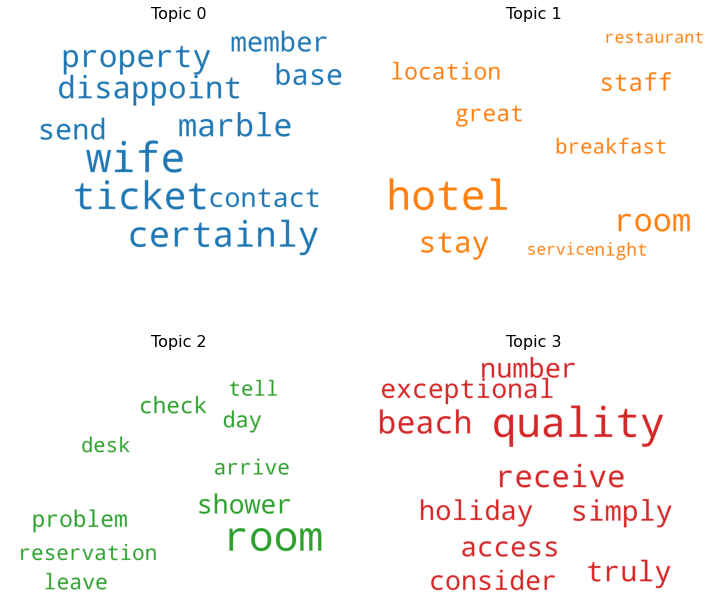

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Word Counts of Topic Keywords

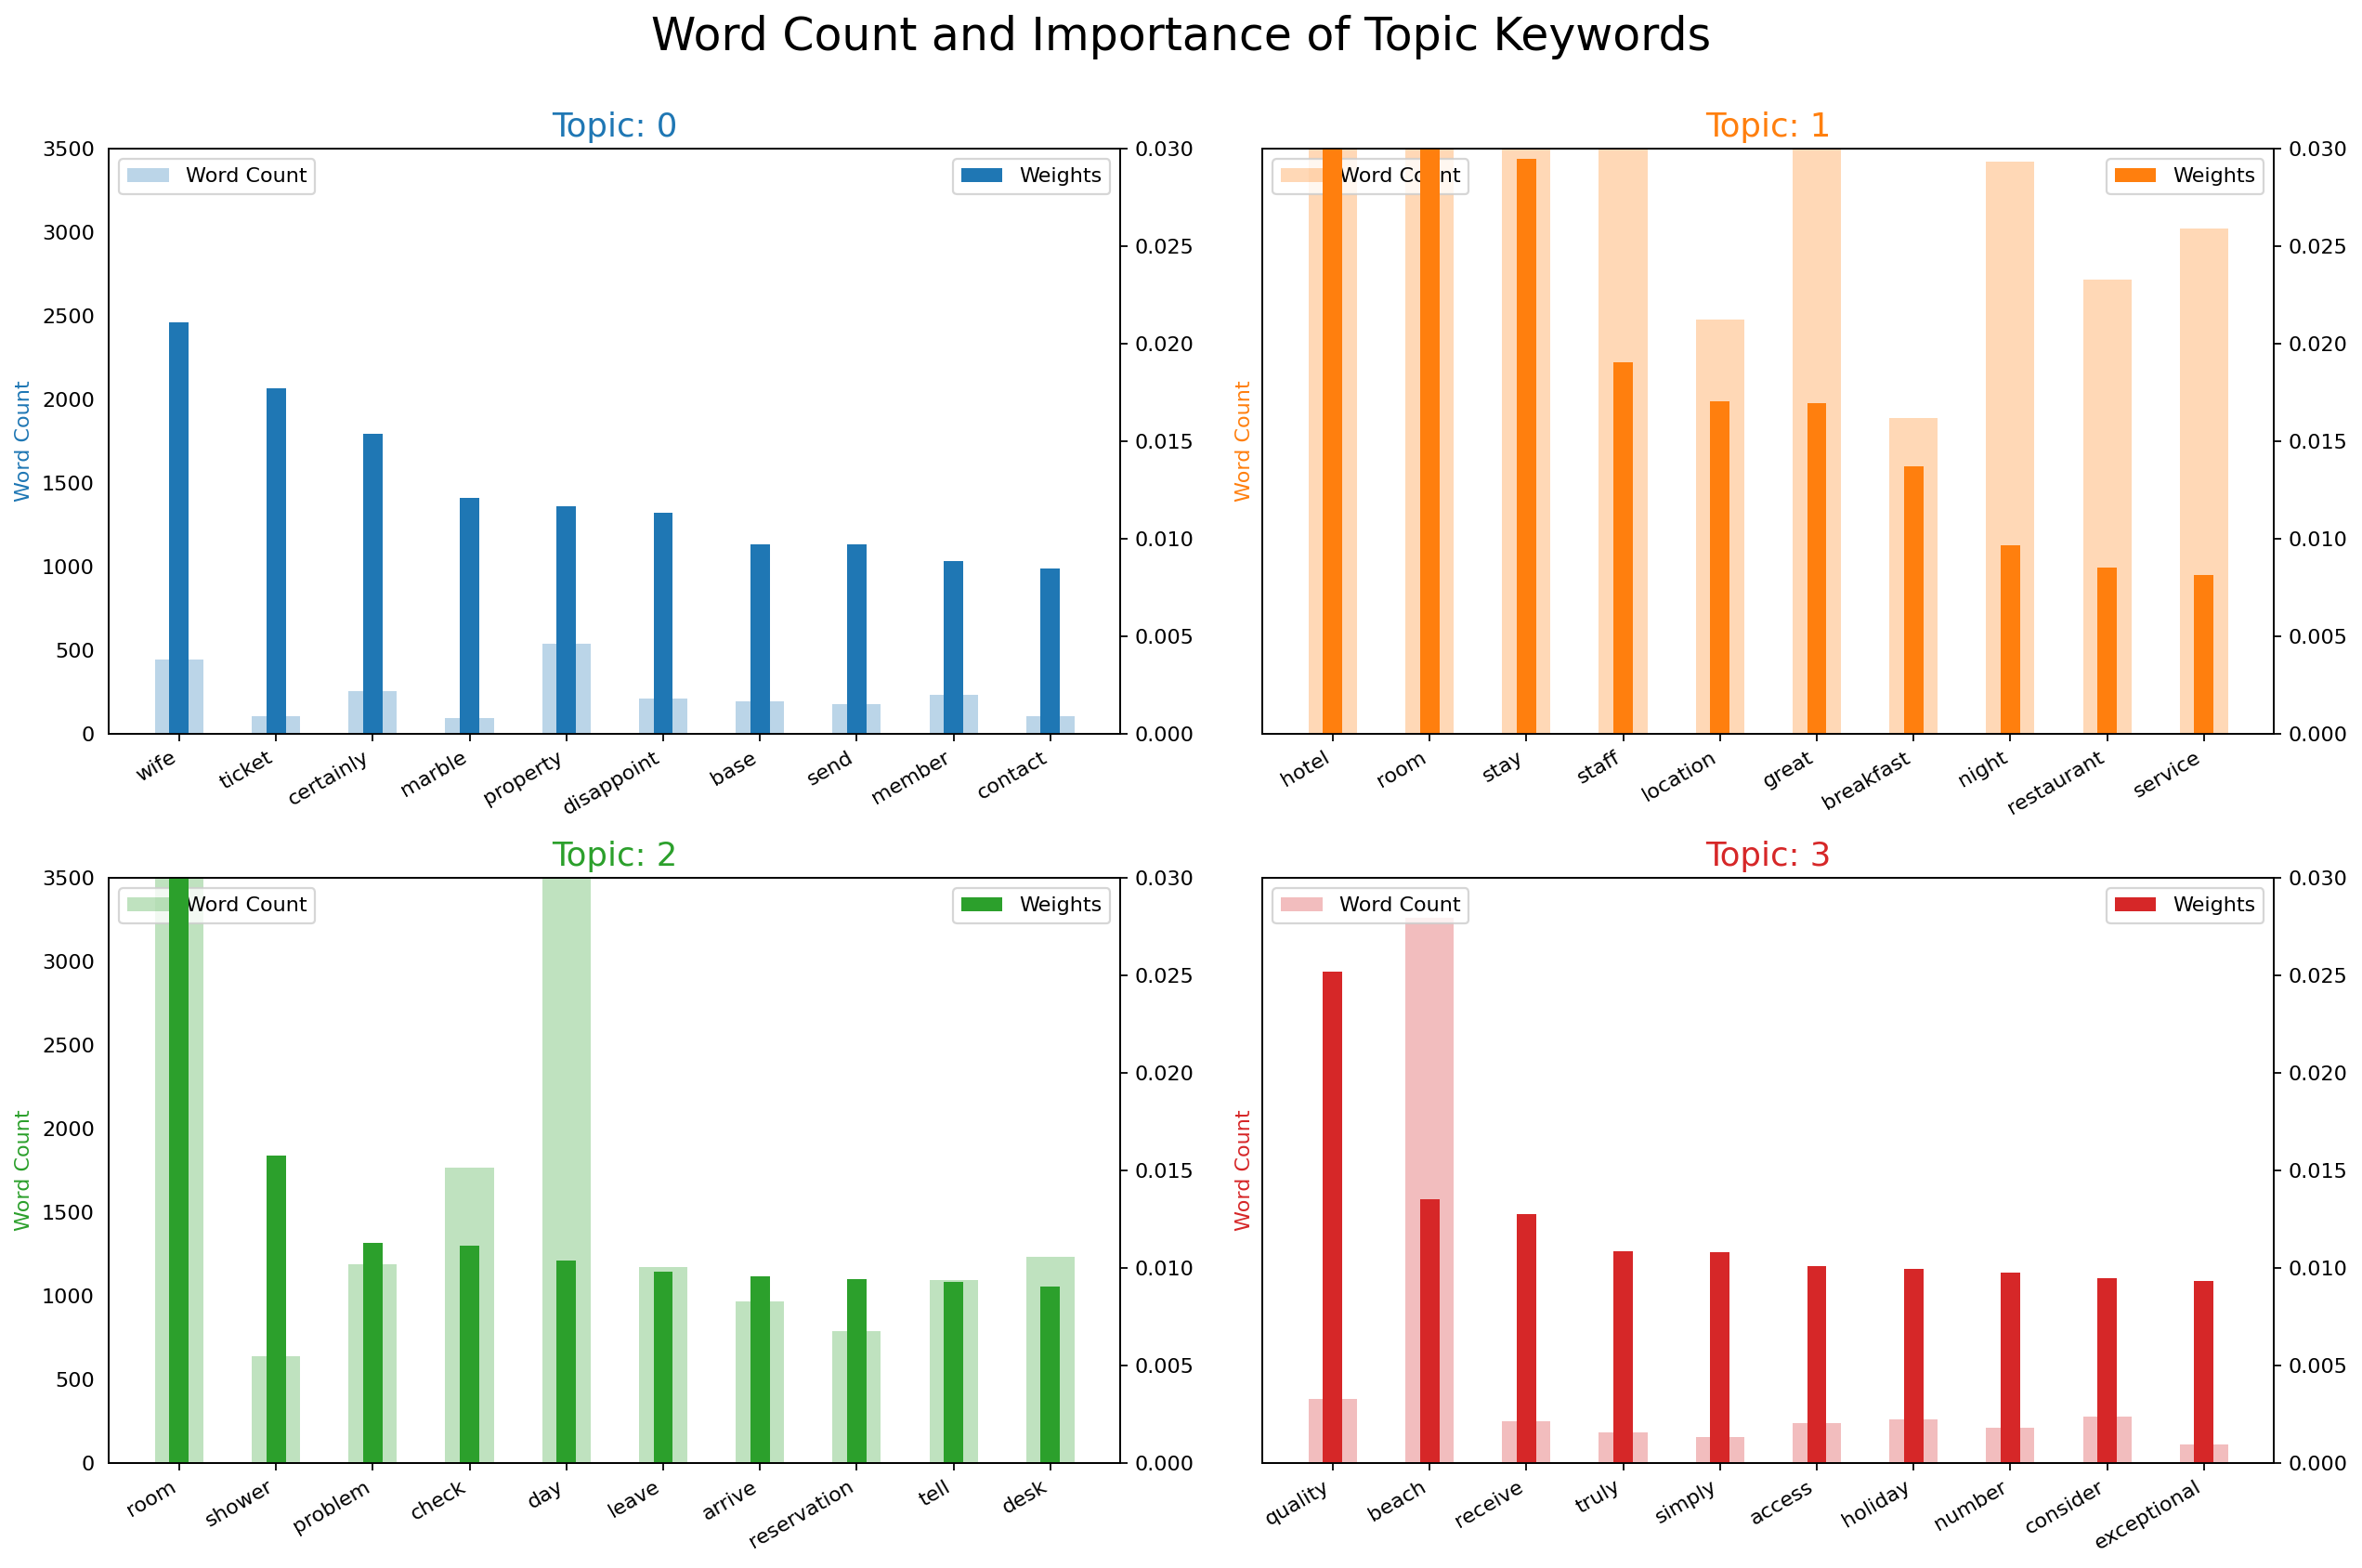

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

# pyLDAVis

<p style = "font-size: 40px;font-weight: bold;text-align:left;color:#0000FF"> What is pyLDAVis? </p>

**pyLDAvis is a general-purpose topic model visualization interface that is useful for getting an overview of a model, looking closely at topics, and looking at words associated with topics. Among the general-purpose interfaces, it stands out especially for the “relevance metric” tool that allows the user to adjust the view of words in a topic for better understanding.**

<img align=left src = "https://i0.wp.com/neptune.ai/wp-content/uploads/PyLDAvis.gif">

## Steps to Visualize

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/opt/conda/lib/python3.7/site-packages/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """
/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.314182 -0.155237       1        1  65.868882
2     -0.108774  0.254655       2        1  19.517862
3      0.208899 -0.040422       3        1   8.768217
0      0.214058 -0.058996       4        1   5.845039, topic_info=             Term          Freq         Total Category  logprob  loglift
44           room  13880.000000  13880.000000  Default  30.0000  30.0000
21          hotel  17354.000000  17354.000000  Default  29.0000  29.0000
48           stay   8018.000000   8018.000000  Default  28.0000  28.0000
476       quality    914.000000    914.000000  Default  27.0000  27.0000
156         staff   5181.000000   5181.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
713       imagine    107.279604    108.740076   Topic4  -5.4158   2.8261
2076     question     98.194691     99.561737   Topic4  -5.5043   2.8258
660    impressive    117.421845    119.109007   Topic4  -5.3255   2.8253
1141        train    202.373205    370.292559   Topic4  -4.7811   2.2354
16686        arno    141.619431    402.156152   Topic4  -5.1381   1.7959

[187 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
461        3  0.996221     access
255        1  0.999071       area
255        3  0.000654       area
16686      1  0.340664       arno
16686      2  0.114383       arno
...      ...       ...        ...
293        3  0.000734  wonderful
253        1  0.246755       work
253        2  0.752244       work
253        3  0.001198       work
1032       3  0.995567      write

[309 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])